In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {'username':'','key':''}

import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d cashutosh/gender-classification-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
gender-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q /content/gender-classification-dataset.zip

replace Training/female/131422.jpg.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import cv2
import os
import numpy as np

# Función para leer dataset de imagenes
def get_images(path):
    X = []
    y = []
    # Iterar por directorios
    for dir in os.listdir(path):
        dir_path = path + '/' + dir
        # Iterar por archivos
        for f in os.listdir(dir_path):
            image_path = dir_path + '/' + f
            # Leer imagen
            image = cv2.imread(image_path)
            # Reducir el tamaño de la imagen
            image = cv2.resize(image, (30,40), interpolation = cv2.INTER_AREA)
            # Cambiar la imagen a blanco y negro
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # Volver la imagen un vector
            image = np.ravel(image)
            cv2.destroyAllWindows()
            # Agregar el genero de la imagen
            X.append(image)
            if dir == 'female':
                y.append(1)
            else:
                y.append(0)
    # X retorna los vectores de imagenes
    # y retorna el genero de las imagenes
    return(X, y)

# Leer dataset de train
X_train, y_train = get_images('/content/Training')
# Leer dataset de test
X_test, y_test = get_images('/content/Validation')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Definimos diferentes vecinos
n_neighbors = [3, 9, 15, 21]
accuracy = []
# Verificamos la exactitud el modelo con cada vecino
for k in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test, y_test))

In [ ]:
# Imprimimos la exactitud del modelo con cada vecino
for i in range(len(n_neighbors)):
    print("k =", n_neighbors[i], ' - accuracy =', accuracy[i])

# Encontramos la cantidad optima de vecinos
k_opt = n_neighbors[np.argmax(accuracy)]
print(f"El número óptimo de vecinos es {k_opt}")

k = 3  - accuracy = 0.8324319684093056
k = 9  - accuracy = 0.8474547171431024
k = 15  - accuracy = 0.8518327753455233
k = 21  - accuracy = 0.8516610867885656
El número óptimo de vecinos es 15


[Text(0.5, 0, 'Number of neighbors'),
 Text(0, 0.5, 'Accuracy (%)'),
 Text(0.5, 1.0, 'k-NN Classification')]

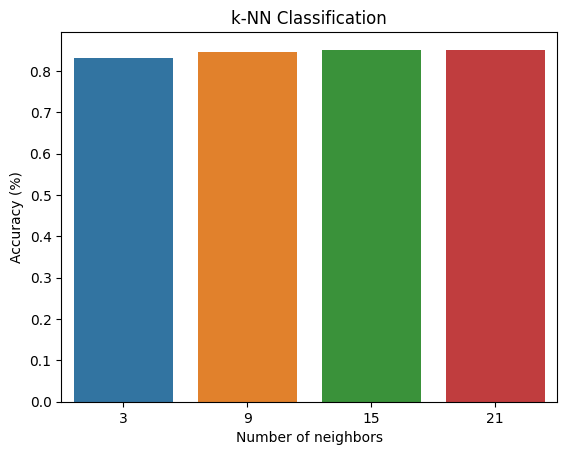

In [ ]:
# Graficamos la exactitud del modelo con cada vecino
import seaborn as sns
gfg = sns.barplot(x=n_neighbors, y=accuracy)
gfg.set(xlabel ="Number of neighbors", ylabel = "Accuracy (%)", title ='k-NN Classification')

In [ ]:
# Entrenamos el modelo con la cantidad optima de vecinos
clf = KNeighborsClassifier(n_neighbors=k_opt)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

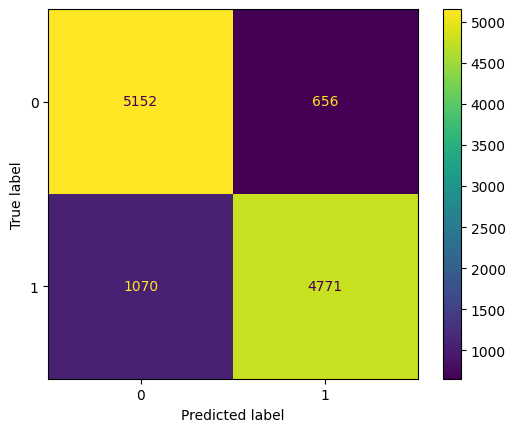

Accuracy: 0.8518327753455233


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print("Accuracy:", np.max(accuracy))